# Report
#### _Firstly, prepare libraries that we need._

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

#### _Load and clean the data_

In [2]:

df = pd.read_csv('DataCoSupplyChainDataset.csv', parse_dates=['order date (DateOrders)'],encoding='latin1')
df = df.sort_values('order date (DateOrders)')

#### _Columns name_

In [3]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

#### _Drop Critical information and unnecessary columns._

In [4]:
df.drop(['Product Description','Customer Password','Customer Email',
         'Customer Email','Order Zipcode', 'Customer Zipcode','Customer Lname',
         'Product Image','Customer Fname'], axis = 1, inplace = True)

#### _Columns' data types and availability_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180519 entries, 33833 to 17863
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  Cu

#### _Calculate total of not avaialable cells._

In [6]:
df.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id       

In [7]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

#### _Create year column from order date columns._

In [8]:
df['year'] = df['order date (DateOrders)'].dt.year

#### _Create month column from order date columns._

In [42]:
df['month'] = df['order date (DateOrders)'].dt.month
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

#### _Get Descriptive statistics of each column._

In [10]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status,year,month
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,5.443460,29.719955,-84.915675,...,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550,0.0,2015.971150,6.235449
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,2.000000,-33.937553,-158.025986,...,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0,2015.000000,1.000000
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,4.000000,18.265432,-98.446312,...,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0,2015.000000,3.000000
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,5.000000,33.144863,-76.847908,...,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0,2016.000000,6.000000
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,7.000000,39.279617,-66.370583,...,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0,2017.000000,9.000000
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,12.000000,48.781933,115.263077,...,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0,2018.000000,12.000000
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,1.629246,9.813646,21.433241,...,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492,0.0,0.829429,3.403571


### *Summarize Net Sales with discount and Sales in mean and total table group by year.*
#### _For more accurate need group rows using order id to get one value represent each order._ 

In [11]:
grouped_df = df.groupby('Order Id').first().reset_index()
pivot_table = grouped_df.pivot_table(values=['Sales','Order Item Total'], index=['year'], aggfunc='mean')
pivot_table2 = df.pivot_table(values=['Sales','Order Item Total'], index=['year'], aggfunc='sum')
pivot_table.columns = ['Net Sales', 'Sales']
pivot_table2.columns = ['Net Sales', 'Sales']
print("Pivot Table: Mean of Net Sales and Sales Grouped by Year")
print(pivot_table)
print("Pivot Table2: Total of Net Sales and Sales Grouped by Year")
print(pivot_table2)

Pivot Table: Mean of Net Sales and Sales Grouped by Year
       Net Sales       Sales
year                        
2015  177.220489  197.191756
2016  177.907361  198.013097
2017  220.643208  245.478559
2018  140.344819  156.217671
Pivot Table2: Total of Net Sales and Sales Grouped by Year
         Net Sales         Sales
year                            
2015  1.108954e+07  1.234083e+07
2016  1.105600e+07  1.230382e+07
2017  1.061091e+07  1.180844e+07
2018  2.979521e+05  3.316501e+05


#### _Calculate On-Time Shipping Rate_

In [12]:
df['on_time_shipping'] = df['Days for shipping (real)'] <= df['Days for shipment (scheduled)']
on_time_shipping_rate = df['on_time_shipping'].mean() * 100
print(f"On-Time Shipping Rate: {on_time_shipping_rate:.2f}%")

On-Time Shipping Rate: 42.72%


#### _Calculate Average Delay Rate in Shipping_

In [13]:
df['shipping_delay_status'] = (df['Days for shipping (real)'] > df['Days for shipment (scheduled)'])
average_delay_rate = df['shipping_delay_status'].mean() * 100
print(f"Delay in Shipping Rate: {average_delay_rate:.2f}%")

Delay in Shipping Rate: 57.28%


#### _Calculate Shipping Variability_

In [14]:
df['shipping_delay'] = (df['Days for shipping (real)'] - df['Days for shipment (scheduled)'])
average_delay = df['shipping_delay'].mean()
shipping_variability = df['shipping_delay'].std()
print(f"Shipping Variability: {shipping_variability:1f} days")

Shipping Variability: 1.490966 days


#### _Grouping by Item name and summing the quantities and total costs_

In [15]:
grouped_item = df.groupby('Product Name').agg({'Order Item Quantity': 'sum', 'Order Item Total': 'sum'}).reset_index()
grouped_item

,Product Name,Order Item Quantity,Order Item Total
0,Adult dog supplies,492,37318.299847
1,Baby sweater,207,10957.400143
2,Bag Boy Beverage Holder,845,19009.969910
3,Bag Boy M330 Push Cart,208,14981.660008
4,Bowflex SelectTech 1090 Dumbbells,10,5171.899902
...,...,...,...
113,adidas Kids' F5 Messi FG Soccer Cleat,781,24626.510213
114,adidas Men's F10 Messi TRX FG Soccer Cleat,939,50354.210668
115,adidas Men's Germany Black Crest Away Tee,859,19279.919983
116,adidas Youth Germany Black/Red Away Match Soc,969,61037.900009


#### _Sorting the DataFrame based on Quantity and selecting the top 10 items_

In [16]:
top_10_df = grouped_item.sort_values(by='Order Item Quantity', ascending=False).head(10)
top_10_df

,Product Name,Order Item Quantity,Order Item Total
71,Perfect Fitness Perfect Rip Deck,73698,3.973180e+06
59,Nike Men's Dri-FIT Victory Golf Polo,62956,2.828708e+06
67,O'Brien Men's Neoprene Life Vest,57803,2.596454e+06
61,Nike Men's Free 5.0+ Running Shoe,36680,3.295693e+06
102,Under Armour Girls' Toddler Spine Surge Runni,31735,1.140771e+06
56,Nike Men's CJ Elite 2 TD Football Cleat,22246,2.598494e+06
24,Field & Stream Sportsman 16 Gun Fire Safe,17325,6.226935e+06
70,Pelican Sunstream 100 Kayak,15500,2.785518e+06
21,Diamondback Women's Serene Classic Comfort Bi,13729,3.700784e+06
22,ENO Atlas Hammock Straps,998,2.687578e+04


#### _Generating summary report_

In [17]:
summary = top_10_df.describe()
print("Summary Report:")
print(summary)

Summary Report:
       Order Item Quantity  Order Item Total
count            10.000000      1.000000e+01
mean          33267.000000      2.917341e+06
std           24144.038303      1.652137e+06
min             998.000000      2.687578e+04
25%           15956.250000      2.596964e+06
50%           26990.500000      2.807113e+06
75%           52522.250000      3.599511e+06
max           73698.000000      6.226935e+06


#### _Visualizing the Pivot table of top 10 product_

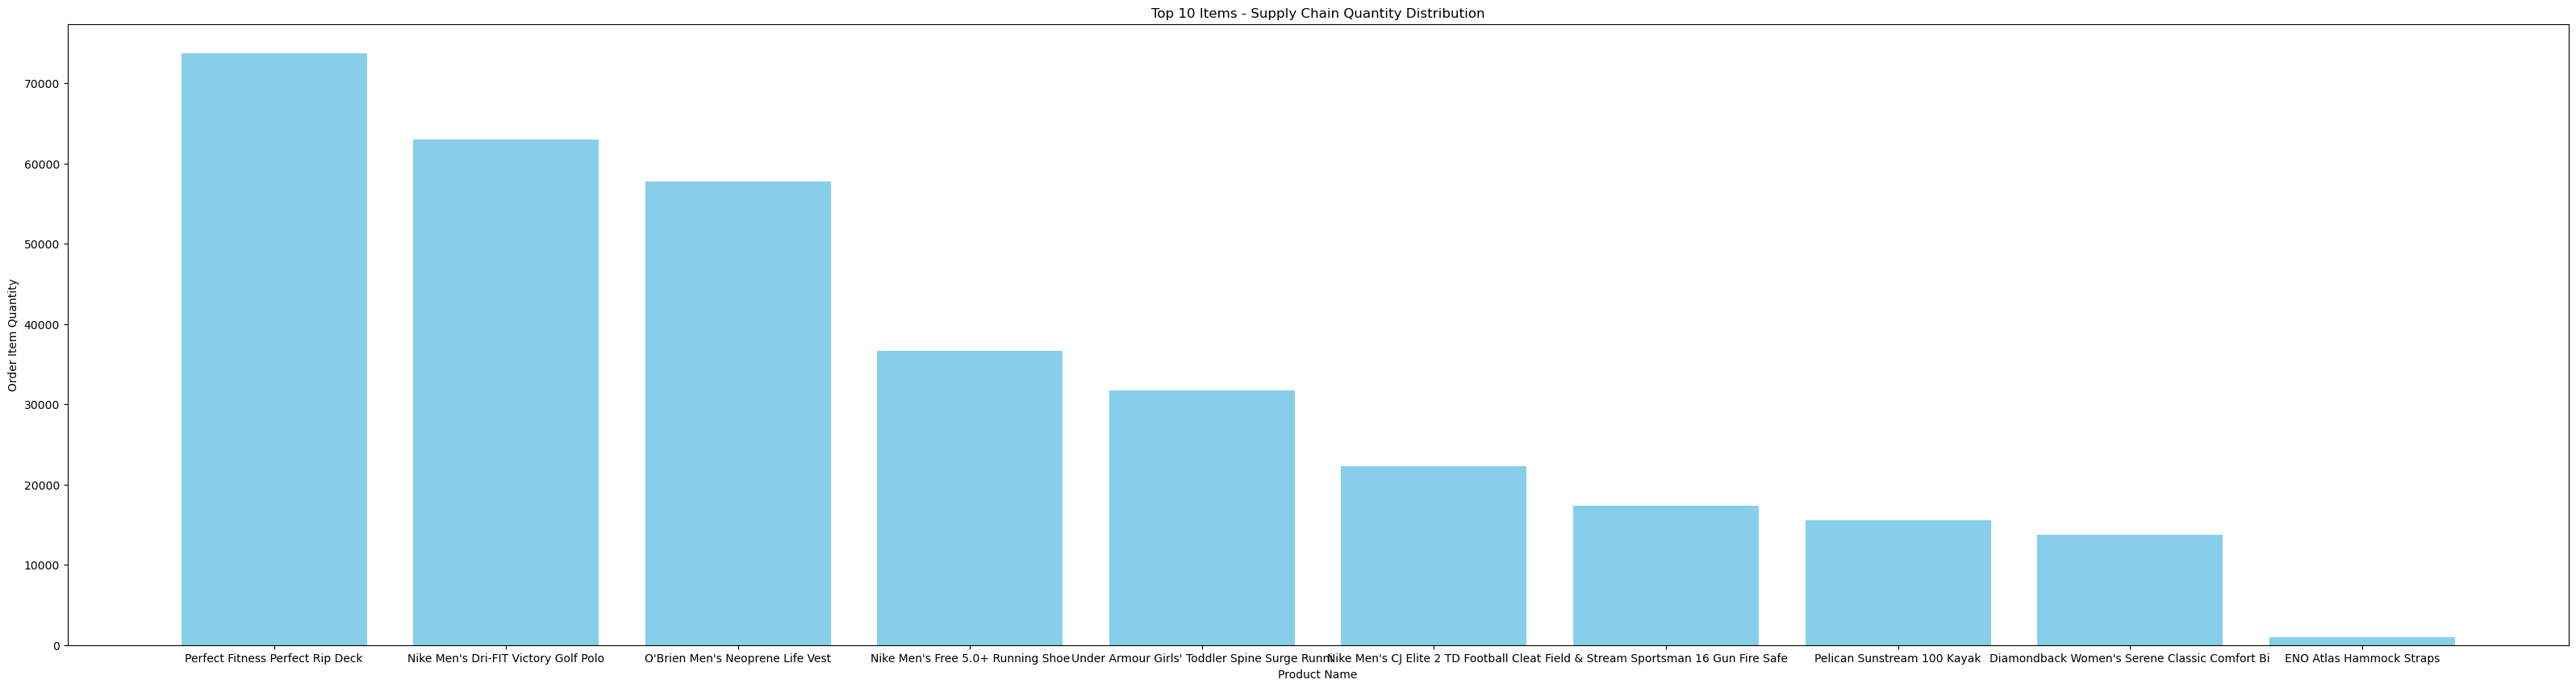

In [18]:
plt.figure(figsize=(40, 10))
plt.bar(top_10_df['Product Name'], top_10_df['Order Item Quantity'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Order Item Quantity')
plt.title('Top 10 Items - Supply Chain Quantity Distribution')
plt.show()

### _Net Sales by Country_

In [19]:
sales_by_country = df.groupby('Order Country')['Order Item Total'].sum().reset_index()

#### _Top 10 Net Sales Per Country_

In [20]:
top_10_net_sales = sales_by_country.sort_values(by='Order Item Total', ascending=False).head(10)
top_10_net_sales

,Order Country,Order Item Total
48,Estados Unidos,4.385242e+06
53,Francia,2.590323e+06
102,México,2.368426e+06
2,Alemania,1.862578e+06
8,Australia,1.521410e+06
120,Reino Unido,1.450047e+06
20,Brasil,1.433101e+06
31,China,1.052753e+06
75,Italia,9.638303e+05
69,India,8.659689e+05


#### _Visualizing Net Sales by Country_

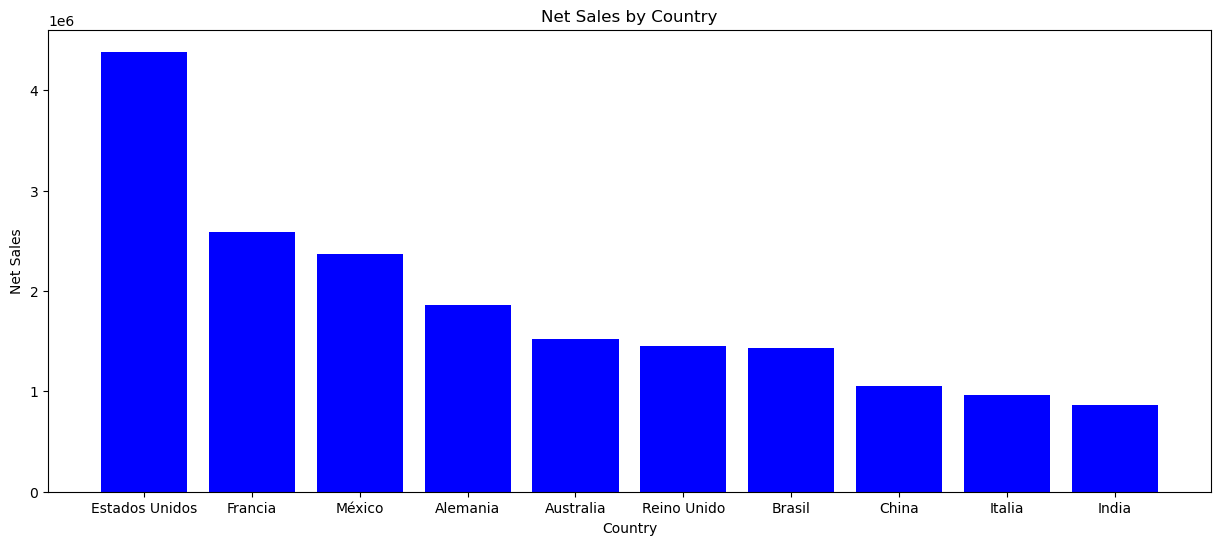

In [21]:
plt.figure(figsize=(15, 6))
plt.bar(top_10_net_sales['Order Country'], top_10_net_sales['Order Item Total'], color='blue')
plt.xlabel('Country')
plt.ylabel('Net Sales')
plt.title('Net Sales by Country')
plt.show()

## **Quantity Shipped Over Time**

#### _Create Actual Delivery Date by adding Actual Shipping Days to Shipping Date_

In [22]:
# Converting DateOrders to datetime
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# Ensure 'Days for shipping' is of integer type
df['Days for shipping (real)'] = df['Days for shipping (real)'].astype(int)

# Adding Delivery Date by adding Days for shipping to DateOrders
df['Actual Delivery Date'] = df['shipping date (DateOrders)'] + pd.to_timedelta(df['Days for shipping (real)'], unit='D')

#### _Calculating Actual Cycle Time as the difference between Actual Delivery Date and Order Date_

In [23]:
df['Actual Cycle Time (Days)'] = (df['Actual Delivery Date'] - df['order date (DateOrders)']).dt.days

#### _Grouping by Shipping Mode and calculating average cycle time_

In [24]:
grouped = df.groupby('Shipping Mode')['Actual Cycle Time (Days)'].mean().reset_index()

#### _Sorting by mean of Actual delivery days_

In [25]:
sorted_grouped = grouped.sort_values(by='Actual Cycle Time (Days)')
sorted_grouped

,Shipping Mode,Actual Cycle Time (Days)
1,Same Day,0.478279
0,First Class,4.000000
2,Second Class,7.981656
3,Standard Class,7.991815


#### _Pivot table for mean of Actual Shipping Days grouping by Customer Segment and Shipping Mode_

In [26]:
actual_seg = df.pivot_table(values='Actual Cycle Time (Days)', index=['Customer Segment','Shipping Mode'], aggfunc='mean').reset_index()

#### _Sort pivot table by Customer Segment and Schedual Shipping Days_

In [27]:
sorted_actual = actual_seg.sort_values(by=['Customer Segment','Actual Cycle Time (Days)'], ascending=True)
sorted_actual

,Customer Segment,Shipping Mode,Actual Cycle Time (Days)
1,Consumer,Same Day,0.486014
0,Consumer,First Class,4.000000
2,Consumer,Second Class,7.965105
3,Consumer,Standard Class,8.008329
5,Corporate,Same Day,0.484034
4,Corporate,First Class,4.000000
7,Corporate,Standard Class,7.945246
6,Corporate,Second Class,7.993059
9,Home Office,Same Day,0.442999
8,Home Office,First Class,4.000000


#### _Creating Schedualed Delivery Date by adding Schedualed Shipping Days to Shipping Date_

In [28]:
# Converting DateOrders to datetime
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# Ensure 'Days for shipping' is of integer type
df['Days for shipment (scheduled)'] = df['Days for shipment (scheduled)'].astype(int)

# Adding Delivery Date by adding Days for shipping to DateOrders
df['Schedualed Delivery Date'] = df['shipping date (DateOrders)'] + pd.to_timedelta(df['Days for shipment (scheduled)'], unit='D')

#### _Calculating Schedualed Cycle Time as the difference between Schedualed Delivery Date and Order Date_

In [29]:
df['Schedualed Cycle Time (Days)'] = (df['Schedualed Delivery Date'] - df['order date (DateOrders)']).dt.days

#### _Grouping by Shipping Mode and calculating average Schedualed cycle time_

In [30]:
grouped = df.groupby('Shipping Mode')['Schedualed Cycle Time (Days)'].mean().reset_index()

#### _Sorting by mean of Schedualed delivery days_

In [31]:
Schedualed_sorted_grouped = grouped.sort_values(by='Schedualed Cycle Time (Days)')
Schedualed_sorted_grouped

,Shipping Mode,Schedualed Cycle Time (Days)
1,Same Day,0.000000
0,First Class,3.000000
2,Second Class,5.990828
3,Standard Class,7.995907


#### _Pivot table for mean of Schedualed Shipping Days grouping by Customer Segment and Shipping Mode_

In [32]:
schedualed_seg = df.pivot_table(values='Schedualed Cycle Time (Days)', index=['Customer Segment','Shipping Mode'], aggfunc='mean').reset_index()

#### _Sort pivot table by Customer Segment and Schedual Shipping Days_

In [33]:
sorted_schedual = schedualed_seg.sort_values(by=['Customer Segment','Schedualed Cycle Time (Days)'], ascending=True)
sorted_schedual

,Customer Segment,Shipping Mode,Schedualed Cycle Time (Days)
1,Consumer,Same Day,0.000000
0,Consumer,First Class,3.000000
2,Consumer,Second Class,5.982553
3,Consumer,Standard Class,8.004164
5,Corporate,Same Day,0.000000
4,Corporate,First Class,3.000000
6,Corporate,Second Class,5.996530
7,Corporate,Standard Class,7.972623
9,Home Office,Same Day,0.000000
8,Home Office,First Class,3.000000


#### _Pivot table for mean of Net Sales grouping by Customer Segment and Shipping Mode_

In [34]:
pivot_seg = df.pivot_table(values='Order Item Total', index=['Customer Segment','Shipping Mode'], aggfunc='mean').reset_index()

#### _Sort Pivot table by Customer Segment and Net Sales_

In [35]:
sorted_pivot_seg = pivot_seg.sort_values(by=['Customer Segment','Order Item Total'], ascending=True)
sorted_pivot_seg

,Customer Segment,Shipping Mode,Order Item Total
1,Consumer,Same Day,179.686130
2,Consumer,Second Class,183.066929
3,Consumer,Standard Class,183.912382
0,Consumer,First Class,184.239123
5,Corporate,Same Day,177.646207
6,Corporate,Second Class,181.855328
4,Corporate,First Class,183.484108
7,Corporate,Standard Class,183.881321
10,Home Office,Second Class,180.340911
9,Home Office,Same Day,180.718626


In [43]:
pivot_year_month = df.pivot_table(values='Order Item Total', index=['year','month', 'month_name'], aggfunc='sum').reset_index()

In [44]:
sorted_year_month = pivot_year_month.sort_values(by=['year','month'], ascending=True)
sorted_year_month

,year,month,month_name,Order Item Total
0,2015,1,January,9.453822e+05
1,2015,2,February,8.330124e+05
2,2015,3,March,9.440501e+05
3,2015,4,April,9.120044e+05
4,2015,5,May,9.439398e+05
5,2015,6,June,9.202421e+05
6,2015,7,July,9.329368e+05
7,2015,8,August,9.251929e+05
8,2015,9,September,9.145224e+05
9,2015,10,October,9.431311e+05


In [45]:
pivot_month = df.pivot_table(values='Order Item Total', index=['month', 'month_name'], aggfunc='sum').reset_index()
pivot_month

,month,month_name,Order Item Total
0,1,January,3.109090e+06
1,2,February,2.595053e+06
2,3,March,2.807828e+06
3,4,April,2.744816e+06
4,5,May,2.862117e+06
5,6,June,2.749136e+06
6,7,July,2.864577e+06
7,8,August,2.864110e+06
8,9,September,2.842006e+06
9,10,October,2.851095e+06


In [46]:
sorted_month_year = pivot_year_month.sort_values(by=['month','year'], ascending=True)
sorted_month_year

,year,month,month_name,Order Item Total
0,2015,1,January,9.453822e+05
12,2016,1,January,9.402836e+05
24,2017,1,January,9.254726e+05
36,2018,1,January,2.979521e+05
1,2015,2,February,8.330124e+05
13,2016,2,February,8.701167e+05
25,2017,2,February,8.919243e+05
2,2015,3,March,9.440501e+05
14,2016,3,March,9.214877e+05
26,2017,3,March,9.422904e+05


#### _Which type of transactions are more important?_

In [49]:
pivot_type = df.pivot_table(values='Order Item Total', index=['Type'], aggfunc='sum').reset_index()

In [50]:
sorted_type = pivot_type.sort_values(by=['Order Item Total'], ascending=True)
sorted_type

,Type,Order Item Total
0,CASH,3.617467e+06
2,PAYMENT,7.631852e+06
3,TRANSFER,9.165574e+06
1,DEBIT,1.263951e+07
